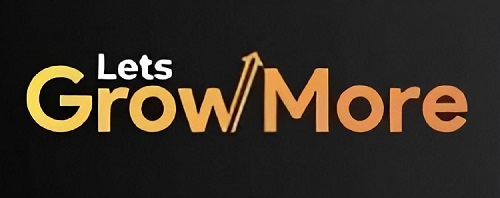

<p style="font-size:22px"><b>Continuation of <br><br>"VIP-LGM Sept21 TASK-9___Part-1(data extraction)"</b></p>


***BY: DURGA MUKESH***

# PART - 2: Model Training-

## Importing Necessary Modules:

In [1]:
import pandas as pd
import numpy as np
import pickle
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import * 
from keras.optimizers import *
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format() # substitute for: keras.backend.image_dim_ordering()
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

In [2]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [3]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [4]:
labels=np.array(labels)

In [5]:
cat=to_categorical(labels,num_classes=13)

In [6]:
print(cat[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [8]:
df_train.shape

(156617, 784)

In [9]:
temp=df_train.to_numpy()

In [10]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [11]:
temp.shape[0]

156617

In [12]:
X_train.shape

(156617, 28, 28, 1)

In [13]:
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [14]:
np.random.seed(7)

In [15]:
len(l[0])

1

In [16]:
X_train.shape

(156617, 28, 28, 1)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, cat, epochs=20, batch_size=200,shuffle=True,verbose=1)

Epoch 1/20
784/784 [==============================] - 58s 73ms/step - loss: 0.3658 - accuracy: 0.9090
Epoch 2/20
784/784 [==============================] - 58s 74ms/step - loss: 0.0697 - accuracy: 0.9800
Epoch 3/20
784/784 [==============================] - 58s 75ms/step - loss: 0.0442 - accuracy: 0.9871
Epoch 4/20
784/784 [==============================] - 55s 70ms/step - loss: 0.0323 - accuracy: 0.9907
Epoch 5/20
784/784 [==============================] - 58s 74ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 6/20
784/784 [==============================] - 57s 73ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 7/20
784/784 [==============================] - 56s 72ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 8/20
784/784 [==============================] - 56s 71ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 9/20
784/784 [==============================] - 56s 71ms/step - loss: 0.0154 - accuracy: 0.9953
Epoch 10/20
784/784 [==============================] - 58s 74ms/step - loss: 0.014

In [19]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

<p style="font-size:22px"><b>Part-3,  CNN Testing in notebook = <br><br>
    "VIP-LGM Sept21 TASK-9___Part-3(CNN test)"</b></p>